In [1]:
from env import RiskEnvFlat
bot_types = ["Neutral"] * 5
env = RiskEnvFlat(bot_types, {})
state = env.reset(seed=1)

placement_phase = 0
attack_source_phase = 1
attack_target_phase = 2
fortify_from_phase = 3
fortify_to_phase = 4

assert(env.phase == placement_phase)

In [2]:
from utils import get_key_for_name, get_name_for_key, print_territory_keys

print("I am", env.agent.name, "\n")

__, key = get_key_for_name("Alaska", env.territories)
print("The Alaska key is", key)

name = get_name_for_key(0, env.territories)
print("The territory for key 0 is", name, "\n")

#print_territory_keys(env.territories)

I am red 

The Alaska key is 0
The territory for key 0 is Alaska 



In [3]:
owned_territories = [i for i, t in enumerate(env.agent.territories) if t == 1]
print(owned_territories)

all_territories = list(range(42)) 
unowned_territories = [t for t in all_territories if t not in owned_territories]

[0, 6, 12, 18, 24, 30, 36]


In [4]:
[get_name_for_key(i, env.territories) for i in owned_territories]

['Alaska',
 'Western US',
 'Great Britain',
 'Yakutsk',
 'China',
 'Brazil',
 'South Africa']

In [5]:
#test the placement phase doesnt progress on illegal moves 
state = env.reset(seed=1)
assert(env.phase == placement_phase) # confirm we init to placement phase 
env.step(42)
assert(env.phase == placement_phase)
env.step(unowned_territories[0])
assert(env.phase == placement_phase)
env.step(owned_territories[0])
assert(env.phase != placement_phase) # test the placement phase DOES progress on legal moves

In [6]:
state = env.reset(seed=1)
results = [
    env.step(42), # fail since you cannot skip placing troops
    env.step(unowned_territories[0]), # fail since agent doesn't own this territory
    env.step(owned_territories[0]), # should successfully add
]
for (s, r, e, _) in results:
    print(r)

-100
-100
0.0


normalized troop count: [1.         0.68965517 0.68965517 0.68965517 0.68965517 0.68965517]
normalized turns passed: 0.0
phases: [0. 1. 0. 0. 0.]
prev move: 42.0


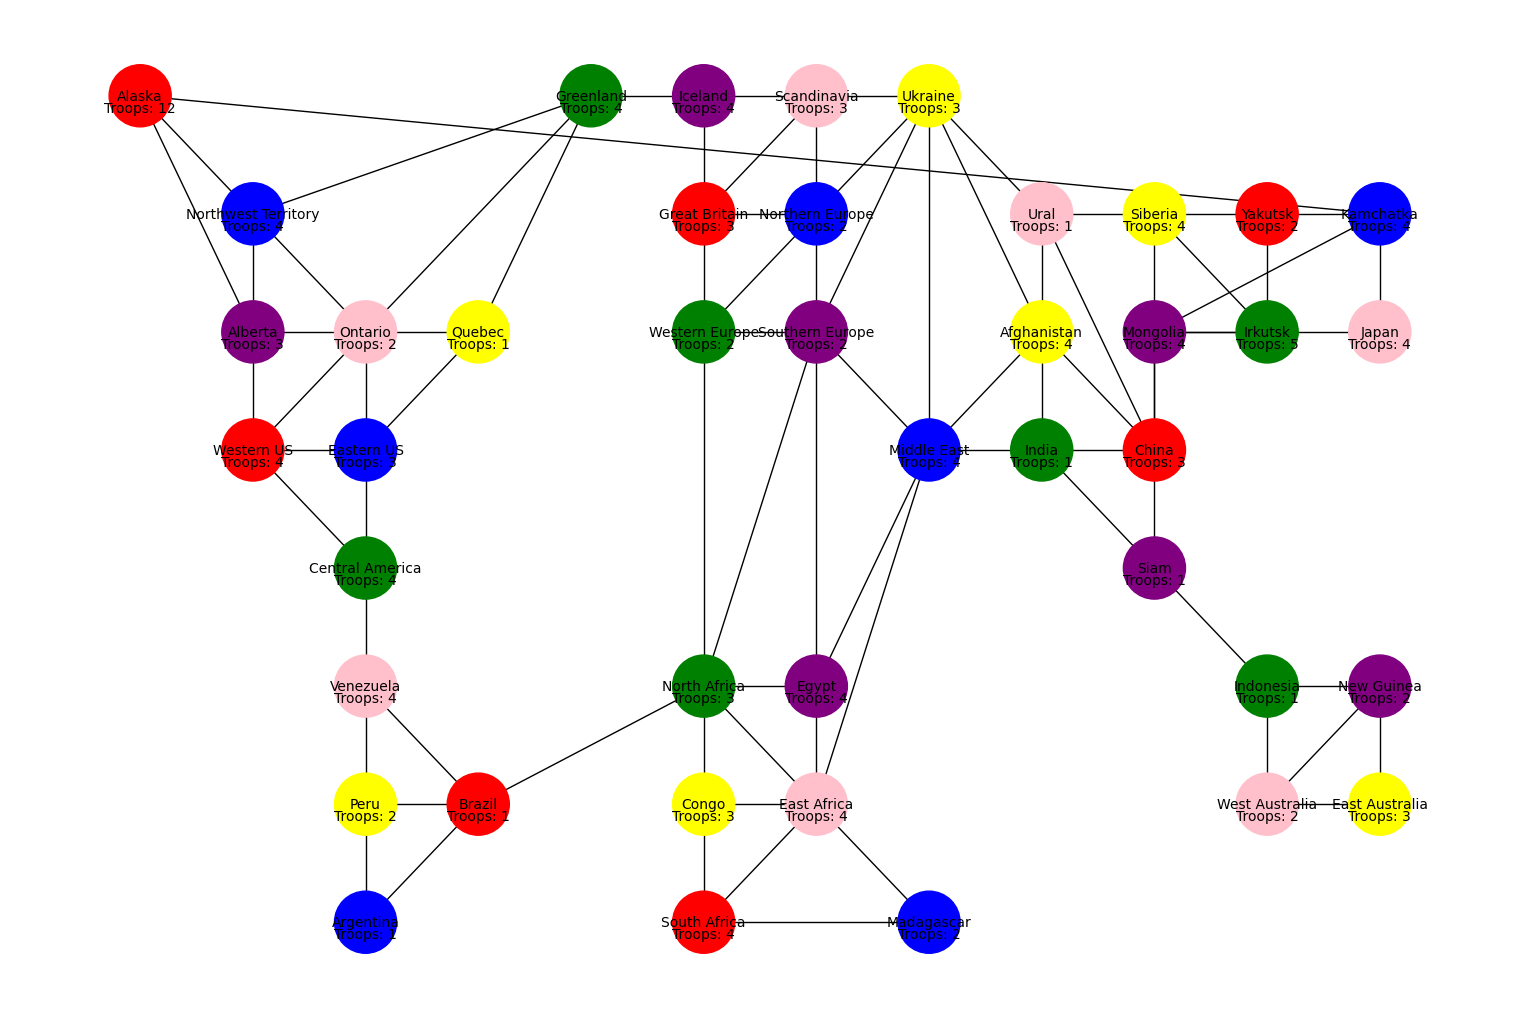

In [7]:
env.get_state(True)
env.show_board()

In [8]:
#for (more) independent cells, reset the environment and execute all prior legal moves 
state = env.reset(seed=1)
env.step(owned_territories[0])

# Confirm you can't attack from a territory with 1 troop or one that you don't own
assert(env.phase == attack_source_phase)
ones_only = [i for i in owned_territories if env.territories[i].troop_count == 1]
if ones_only: 
    print("Attempting to attack from", get_name_for_key(ones_only[0], env.territories), ":", env.step(ones_only[0])[1])
print("Attempting to attack from", get_name_for_key(unowned_territories[0], env.territories), ":", env.step(unowned_territories[0])[1])

Attempting to attack from Brazil : -100
Attempting to attack from Northwest Territory : -100


In [9]:
#This cell and below must execute sequentially

# Confirm you can't attack a territory that isn't in neighbors
assert(env.phase == attack_source_phase)
my_name_is = get_name_for_key(owned_territories[0], env.territories)
print("We are attacking from", my_name_is, ":", env.step(owned_territories[0])[1])
assert(env.phase == attack_target_phase)

neighbors = env.territories[owned_territories[0]].neighbor_names
print("we have neighbors", neighbors)



neighbors_only = [] 
for name in neighbors: 
    __, key = get_key_for_name(name, env.territories)
    neighbors_only.append(key)

for t in unowned_territories:
    if t not in neighbors_only:
        name = get_name_for_key(t, env.territories)
        print("We are invalidly attacking", name, "from", my_name_is,":", env.step(t)[1])
        assert(env.phase == attack_source_phase) #illegal move does not progress the phase 
        break

enemy_neighbors = [n for n in neighbors_only if n not in owned_territories]
troop_count = [env.territories[n].troop_count for n in enemy_neighbors]
target = [n for n in enemy_neighbors if env.territories[n].troop_count == min(troop_count)][0]
# Do a valid attack (we placed troops into owned_territory[0], it has > 1)
name = get_name_for_key(target, env.territories)
env.step(owned_territories[0])
print("We are validly attacking", name, "from", my_name_is, ":", env.step(target)[1])
assert(env.phase == attack_source_phase)

We are attacking from Alaska : 0
we have neighbors ['Northwest Territory', 'Kamchatka', 'Alberta']
We are invalidly attacking Greenland from Alaska : -100
We are validly attacking Alberta from Alaska : 0


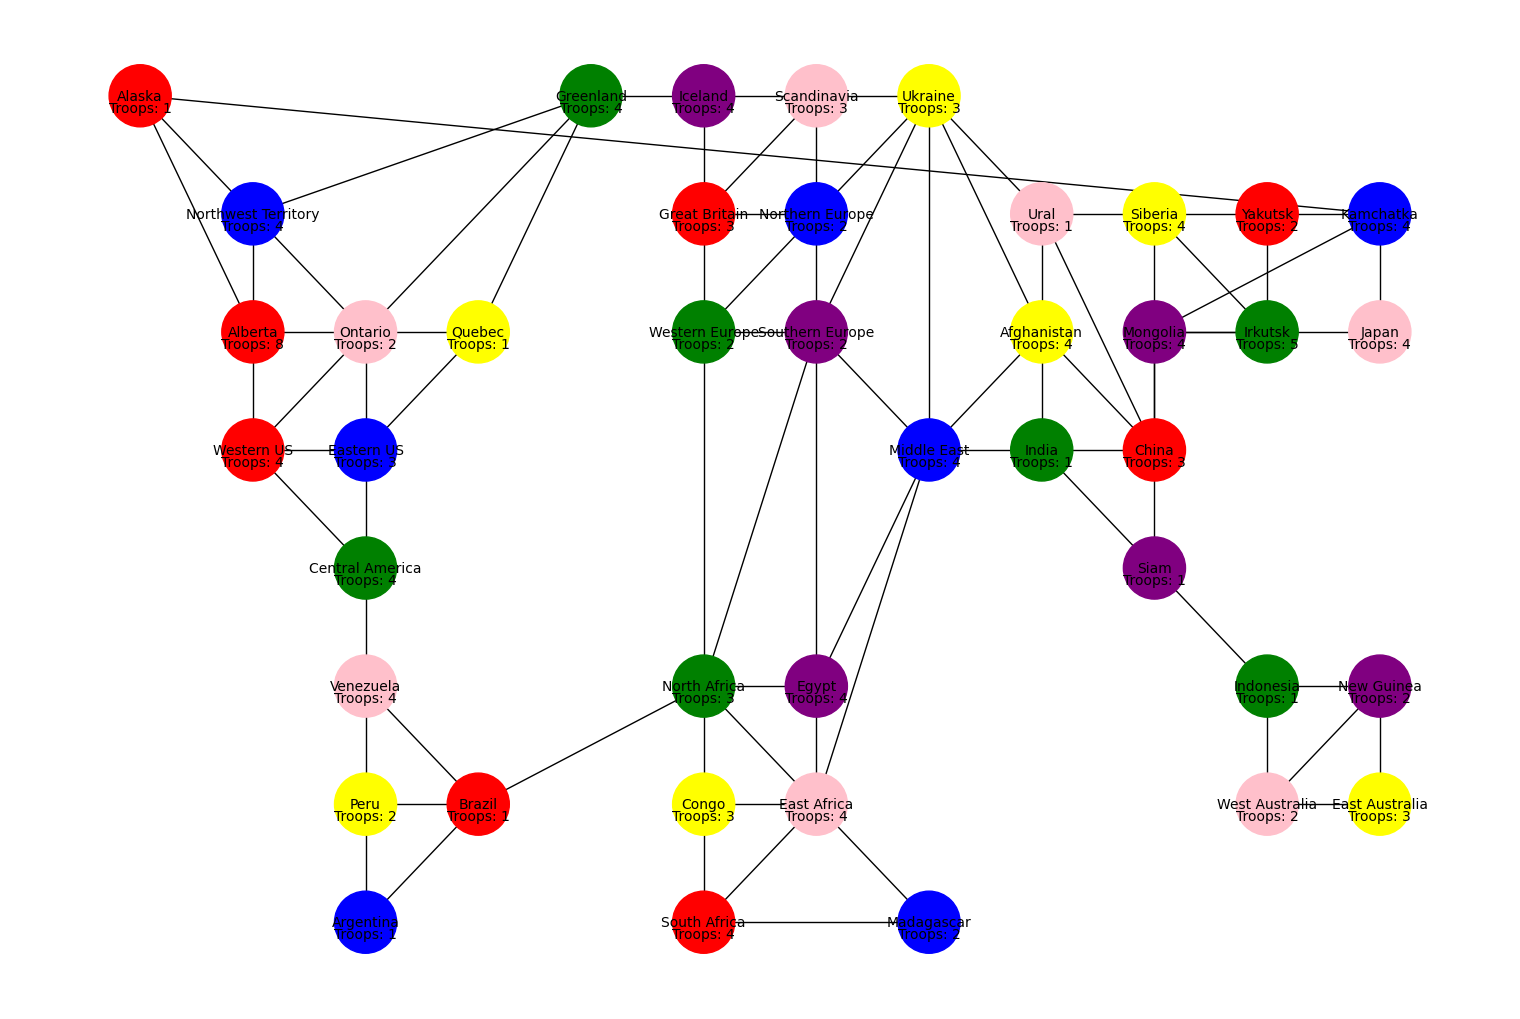

In [10]:
env.show_board()

In [11]:
# Confirm you can't attack your own territory
owned_territories = [i for i, t in enumerate(env.agent.territories) if t == 1]
valid_territories = [i for i in owned_territories if env.territories[i].troop_count > 1]
found = False
for t in valid_territories:
    for n in env.territories[t].neighbors:
        i = env.territories.index(n)
        if i in owned_territories:
            env.step(t)
            print(env.step(i)[1])
            found = True
            break
    if found: 
        break

-100


In [12]:
# Skip to fortify phase
assert(env.phase == attack_source_phase or env.phase == attack_target_phase)
env.step(42)
assert(env.phase == fortify_from_phase)
env.get_state(True)

normalized troop count: [1.         0.76923077 0.76923077 0.76923077 0.65384615 0.76923077]
normalized turns passed: 0.0
phases: [0. 0. 0. 1. 0.]
prev move: 42.0


array([ 1.        ,  0.76923077,  0.76923077,  0.76923077,  0.65384615,
        0.76923077,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.  

In [13]:
# Confirm you can't choose a territory that you don't own or has 1 troop
print(env.step(unowned_territories[0])[1])
print(env.step(owned_territories[0])[1])


-100
-100


In [14]:
# Confirm you can't choose the same territory
env.step(owned_territories[1])
print(env.step(owned_territories[1])[1])

# Confirm you can't choose an enemy territory
env.step(owned_territories[1])
print(env.step(unowned_territories[1])[1])

# Confirm you can't choose a disconnected territory
env.step(owned_territories[1])
print(env.step(owned_territories[-1])[1])

-100
-100
-100


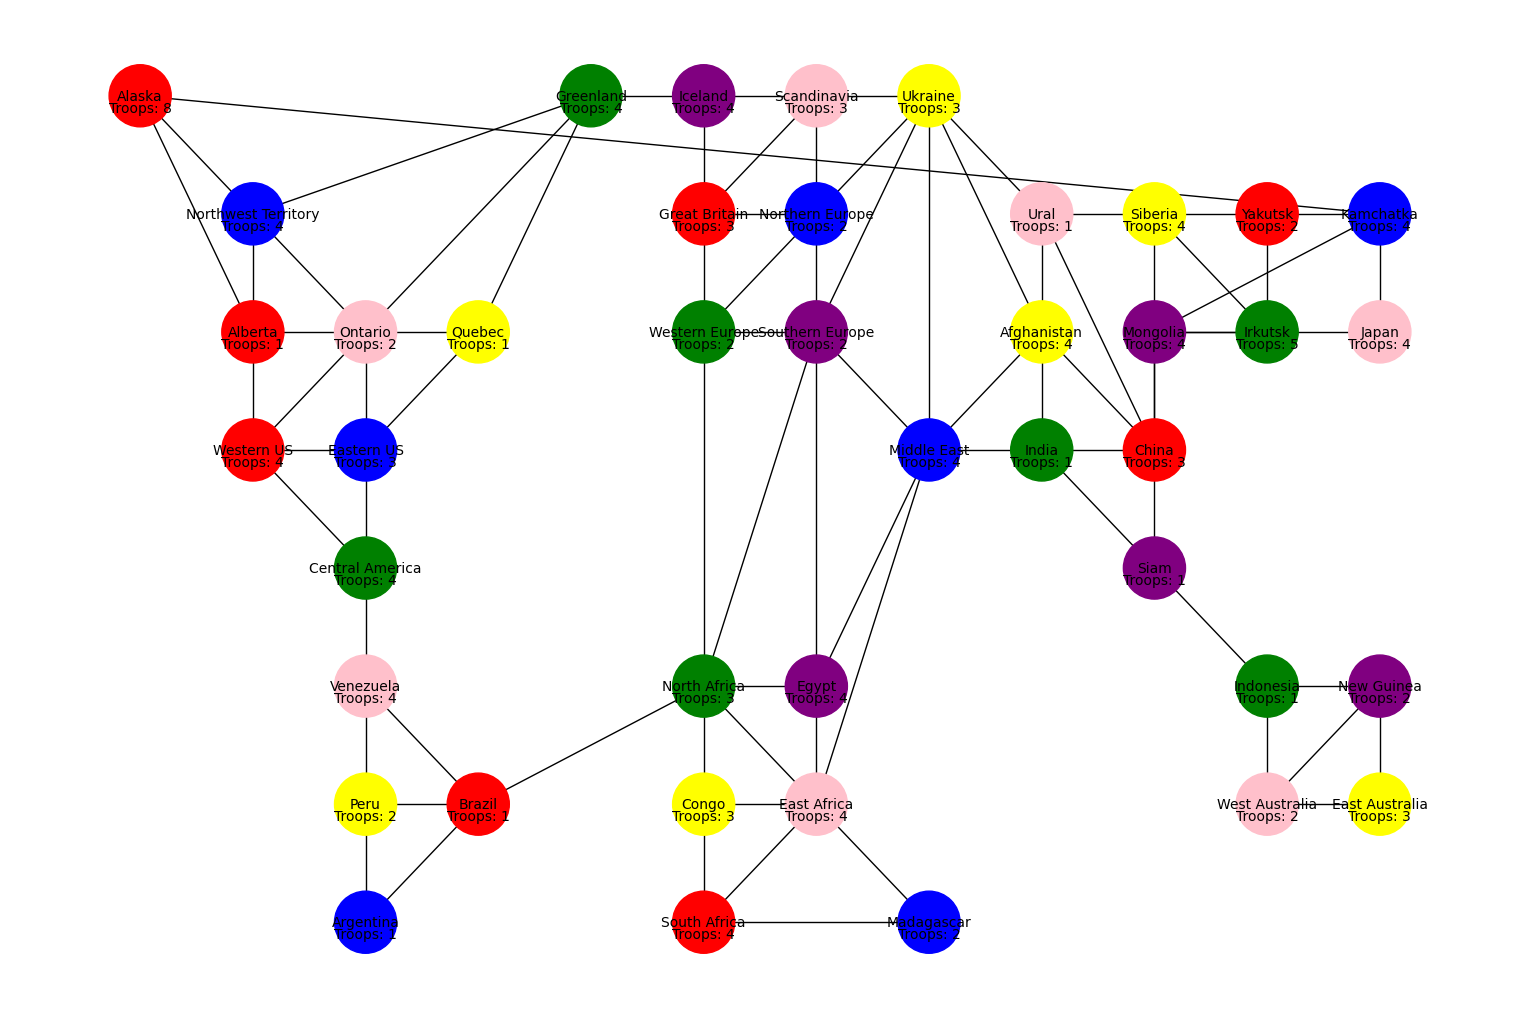

In [15]:
# Make a valid fortify move
assert(env.phase == fortify_from_phase)
env.step(owned_territories[1])
assert(env.phase == fortify_to_phase)
env.step(owned_territories[0])
assert(env.phase == placement_phase)
env.show_board()

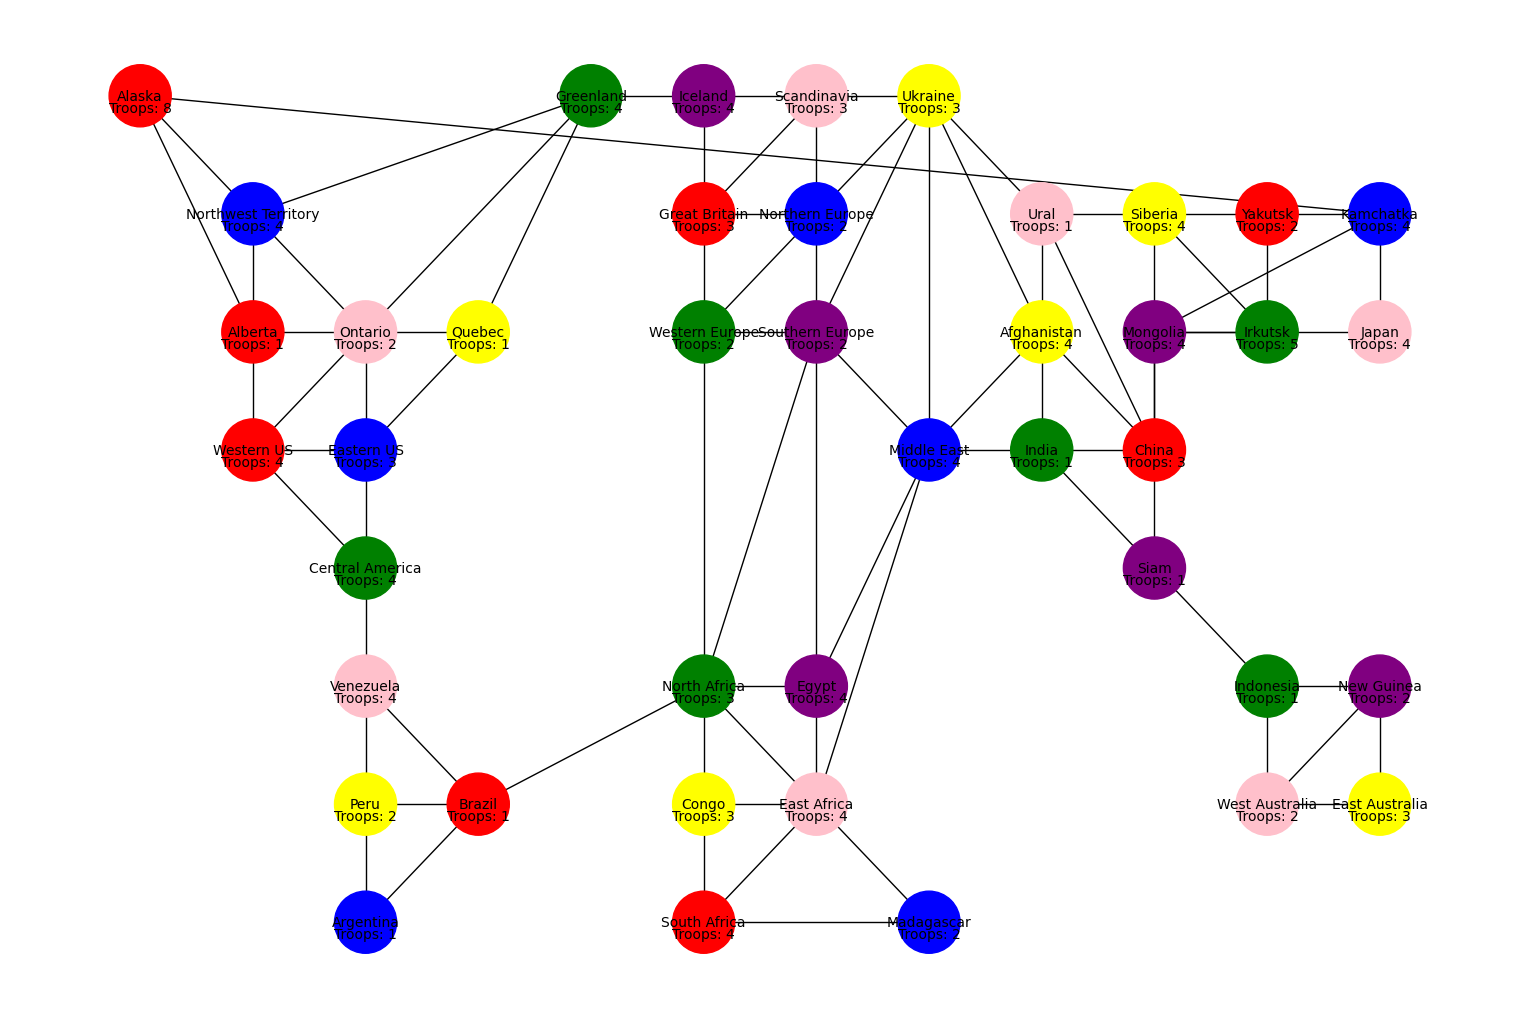

-100


In [16]:
res = env.step(42)
env.show_board()
print(res[1]) # cannot skip placement phase 
assert(env.phase == placement_phase)

In [17]:
env.get_state(True)

normalized troop count: [1.         0.76923077 0.76923077 0.76923077 0.65384615 0.76923077]
normalized turns passed: 0.0
phases: [1. 0. 0. 0. 0.]
prev move: 42.0


array([ 1.        ,  0.76923077,  0.76923077,  0.76923077,  0.65384615,
        0.76923077,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.  

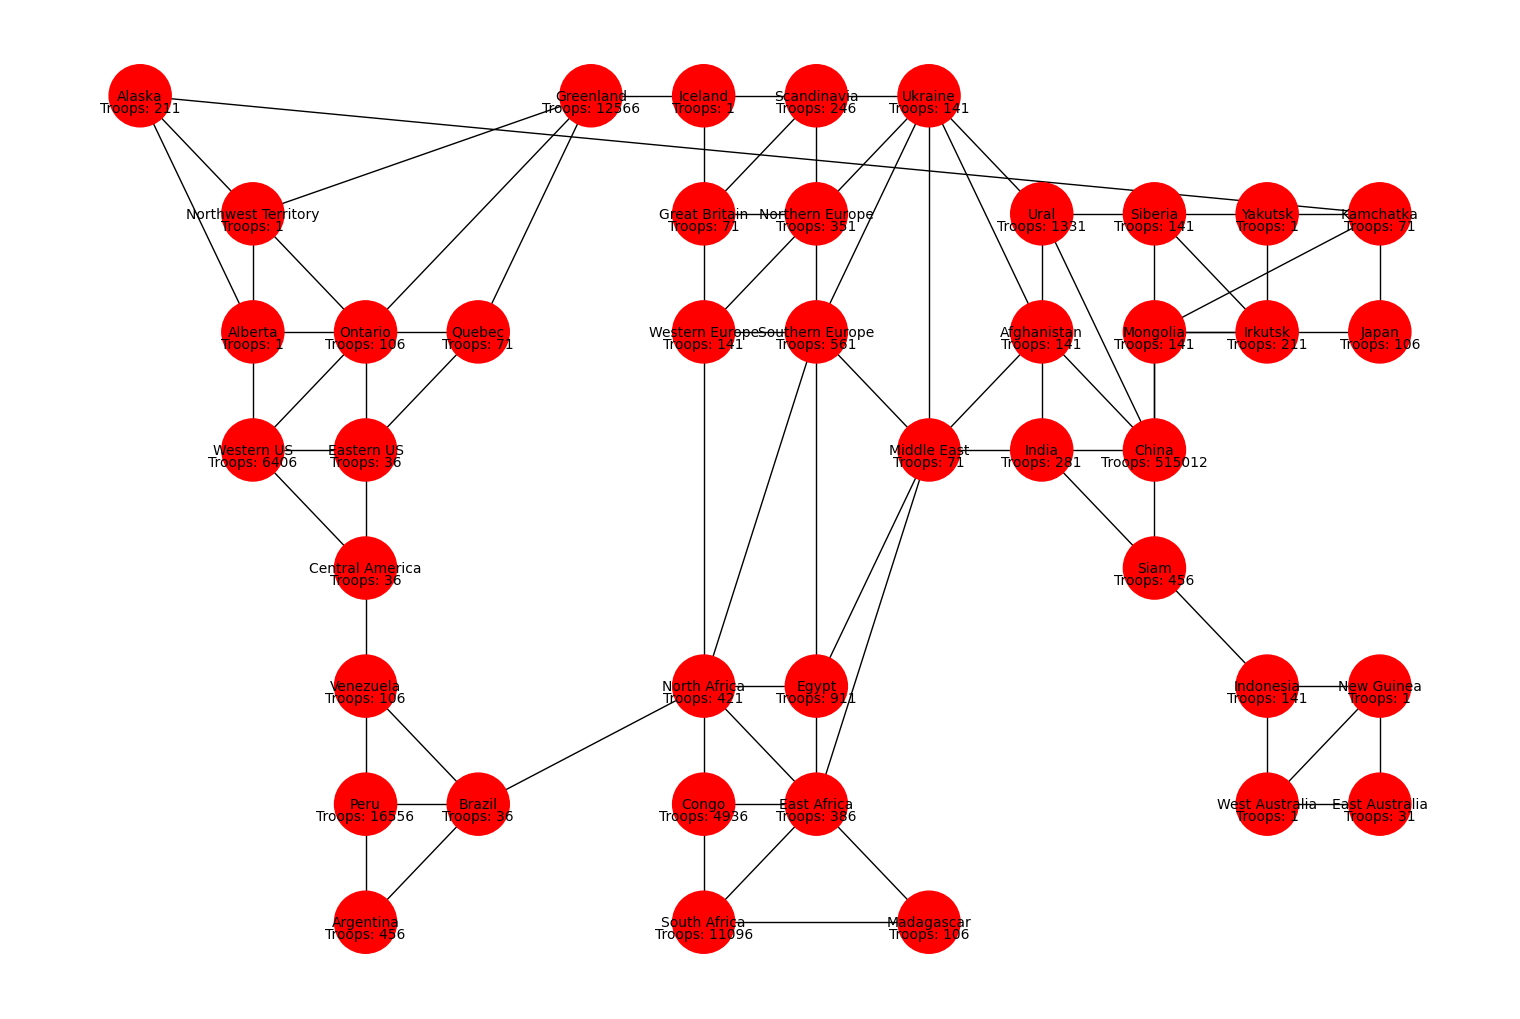

All move attempts: 128074
Illegal moves: 49652
Full turns: 18720
Time taken (seconds): 8.012293815612793
Time per full turn (seconds): 0.00042800714826991414
Estimated time for 1 million full turns (seconds): 428.0071482699141
Estimated time for 1 million full episodes (minutes): 142.66904942330473

The agent has 574093 troops and we expect to see 574093
red  territories remaining 42 , troops remaining 574093 , cumulative reward 4.76
blue  territories remaining 0 , troops remaining 0 , cumulative reward 0
green  territories remaining 0 , troops remaining 0 , cumulative reward 0
yellow  territories remaining 0 , troops remaining 0 , cumulative reward 0
purple  territories remaining 0 , troops remaining 0 , cumulative reward 0
pink  territories remaining 0 , troops remaining 0 , cumulative reward 0


In [23]:
#surely it will end eventually.. right? 
import random
import time

# Start timing
start_time = time.time()

state = env.reset(seed=1)
max_iters = 1000000
iter = 0
turns_passed = 0 
illegal_moves = 0 
prior_phase = env.phase 

# The environment does not change state for illegal moves, so pick whatever you want until the game ends 
while not env.agent_game_ended and iter < max_iters:
    action = -1
    select_42 = random.choice([True, False])  # 50% chance to select 42 / pass turn
    if select_42:
        action = 42
    else:
        action= random.randint(0, 41)  # Select from 0 to 41 inclusive
    env.step(action)
    iter += 1
    if(env.phase != prior_phase):
        prior_phase = env.phase
        if(env.phase == placement_phase):
            turns_passed += 1
    else:
        illegal_moves += 1

end_time = time.time()
time_taken = end_time - start_time

env.show_board()

# Calculate time per full turn in seconds
time_per_turn = time_taken / turns_passed
# Estimate how long 1 million full turns would take
time_for_million_turns = time_per_turn * max_iters

print("All move attempts:", iter)
print("Illegal moves:", illegal_moves)
print("Full turns:", turns_passed)
print("Time taken (seconds):", time_taken)
print("Time per full turn (seconds):", time_per_turn)
print("Estimated time for 1 million full turns (seconds):", time_for_million_turns)
print("Estimated time for 1 million full episodes (minutes):", time_for_million_turns * 20 * (1/60))
print("")

#results show that we could certainly be faster, ESPECIALLY for more computationally expensive bots, 
#this is (maybe?) workable. this time doesn't even include the time we need to optimize the Agent or to
#have the Agent select moves using a neural network (but we can use CUDA there). possibly, we need to 
#spawn multiple processes for the Agent to simulate experience in parallel, but not sure we'd even 
#gain anything in doing so given A: overhead, B: only 1 process can use CUDA, C: additonal mem management 
# 
#there will be some trade between the Agent requiring more computation to select moves, but also wasting
#less computation on random moves as it learns. given that the number of illegal moves here is actually not all that high, 
#we wont save much computation from that. we will save computation from the Agent learning to make more meaningful
#moves that end games faster (constant gets smaller) 

manually_calculated_total_troops = 0
for t in env.territories:
    manually_calculated_total_troops += t.troop_count
print("The agent has", env.agent.total_troops, "troops and we expect to see", manually_calculated_total_troops)
assert(manually_calculated_total_troops == env.agent.total_troops)

#expect all players but Agent to have 0 troops and 0 territories 
#expect the Agent to have a very negative cumulative reward 
#... 
#but what we see is a positive reward, because illegal scenarios have just directly returned the experience of a negative
#reward instead of calling the reward function. which is fine depending on how we handle it, so "cumulative reward" 
#in this case is actually cumulative legal reward... or what actually transpired... incidentally handy  
# ...
#but because we apply a penalty for taking too long, we would expect that number to be negative, and it isnt 
#it may be that because that negative reward is only applied on a turn basis, that while we pass a lot of iterations, 
#we don't pass so many turns relative to positive reward. and also the penalty could be too small. or could be some 
#other error 
for p in env.players:
    print(p.name, " territories remaining", p.territory_count, ", troops remaining", p.total_troops, ", cumulative reward", p.cumulative_reward)